# --- Simulation for Question 1C:

True theta: 4.0
Mean of theta-hat: 3.999
SD of theta-hat: 0.557


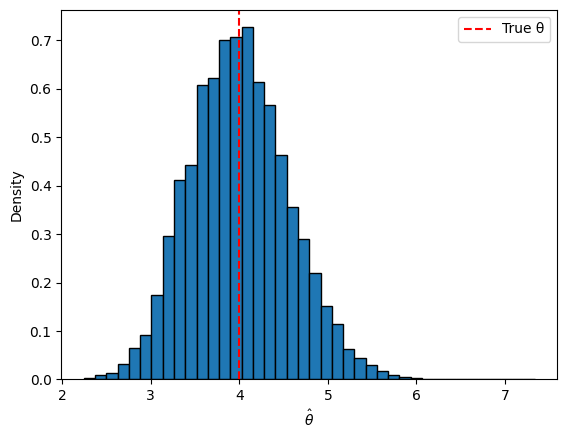

In [34]:
# --- Simulation for Question 1C:
import numpy as np
import matplotlib.pyplot as plt

theta_true = 4.0           # true theta
rate = 1.0 / theta_true    # parameter of Exp(rate)

N = 10_000   # number of repetitions
n = 50       # sample size in each repetition

# For Exp(1/theta), the MLE for theta is the sample mean
theta_hats = np.empty(N)

for i in range(N):
    # sample from Exp(1/theta_true)
    x = np.random.exponential(scale=theta_true, size=n)
    theta_hats[i] = x.mean()

# summary statistics
print(f"True theta: {theta_true}")
print(f"Mean of theta-hat: {theta_hats.mean():.3f}")
print(f"SD of theta-hat: {theta_hats.std(ddof=1):.3f}")

# histogram of the estimator
plt.hist(theta_hats, bins=40, density=True, edgecolor='black')
plt.axvline(theta_true, color='red', linestyle='--', label='True θ')
plt.xlabel(r'$\hat{\theta}$')
plt.ylabel('Density')
plt.legend()
plt.show()

# --- Simulation for Question 2C:

True theta: 1.0
Mean of theta-hat estimators: 1.0082
Variance of theta-hat estimators: 0.0102


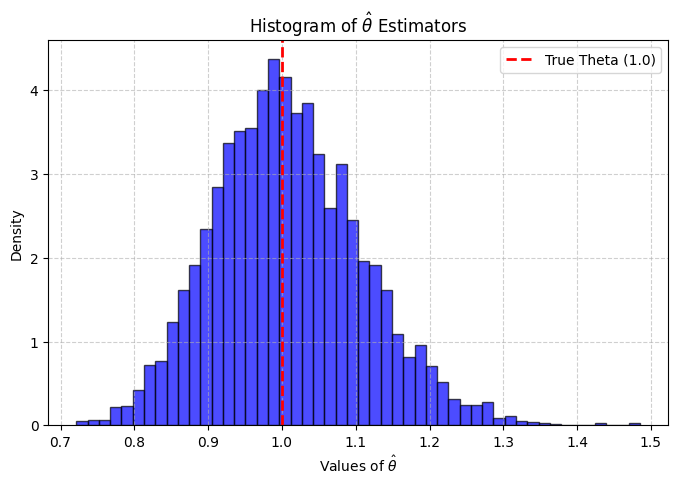

In [35]:
# --- Simulation for Question 2C:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameter Definitions ---
THETA_TRUE = 1.0           # The true parameter value (theta_true = 1)
N_SIMULATIONS = 5000       # Number of repetitions (N = 5000)
SAMPLE_SIZE = 100          # Sample size per repetition (n = 100)

# The rate parameter for the Exponential(1) distribution is lambda=1
LAMBDA_PARAM = 1.0
# Create an array to store estimators from each run
theta_hat_estimators = np.empty(N_SIMULATIONS)

for i in range(N_SIMULATIONS):
    # 1. Draw a sample 'Y' of size n=100 from Exponential(1) distribution
    Y_sample = np.random.exponential(scale=1/LAMBDA_PARAM, size=SAMPLE_SIZE)

    # 2. Transform Y to X using X = ln(Y/theta), with theta_true=1
    # X_sample = np.log(Y_sample / THETA_TRUE) # This gives the Gumbel distribution samples
    # The MLE for theta in the Gumbel case is: theta_hat = n / sum(e^x_i)
    # Using the transformation X = ln(Y), e^x_i = e^(ln(Y_i)) = Y_i
    # So the estimator simplifies to: theta_hat = n / sum(Y_i)
    sum_of_Y = np.sum(Y_sample)
    theta_hat = SAMPLE_SIZE / sum_of_Y

    # Store the estimator
    theta_hat_estimators[i] = theta_hat
# Calculate the mean of estimators
mean_of_estimators = np.mean(theta_hat_estimators)
# Calculate the variance of estimators
variance_of_estimators = np.var(theta_hat_estimators)

print(f"True theta: {THETA_TRUE}")
print(f"Mean of theta-hat estimators: {mean_of_estimators:.4f}")
print(f"Variance of theta-hat estimators: {variance_of_estimators:.4f}")
# histogram of the estimator
plt.figure(figsize=(8, 5))
plt.hist(theta_hat_estimators, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(THETA_TRUE, color='red', linestyle='--', linewidth=2, label=f'True Theta ({THETA_TRUE})')

plt.title(r'Histogram of $\hat{\theta}$ Estimators')
plt.xlabel(r'Values of $\hat{\theta}$')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# --- Simulation for Question 3C:

Mean of alpha-hat: 3.1112424453106735
True alpha: 3.0


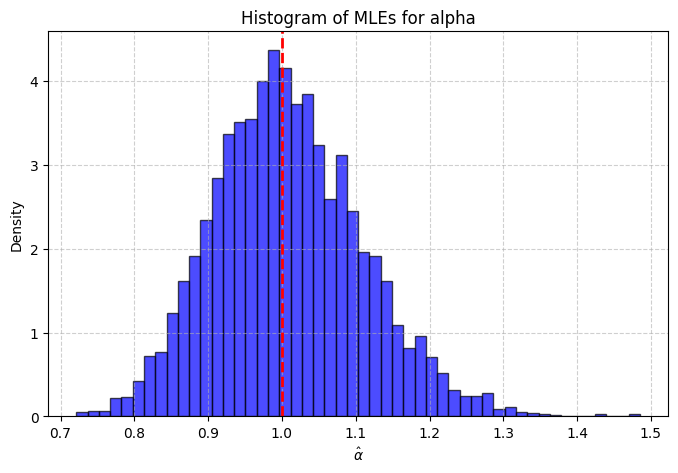

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# parameters
alpha_true = 3.0   # α
lam = 2.0          # λ
N = 10_000         # number of samples
n = 30             # sample size in each sample


def pareto_sample(alpha, lam, size):
    u = np.random.rand(size)
    return lam * ((1 - u) ** (-1.0 / alpha) - 1)


def mle_alpha(x, lam):
    return len(x) / np.sum(np.log(1 + x / lam))

# simulate N samples and compute α-hat for each
alpha_hats = np.empty(N)
for i in range(N):
    x_sample = pareto_sample(alpha_true, lam, n)
    alpha_hats[i] = mle_alpha(x_sample, lam)

# mean of the estimators
mean_alpha_hat = np.mean(alpha_hats)
print("Mean of alpha-hat:", mean_alpha_hat)
print("True alpha:", alpha_true)

# histogram of α-hat
plt.figure(figsize=(8, 5))
plt.hist(theta_hat_estimators, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(THETA_TRUE, color='red', linestyle='--', linewidth=2, label=f'True Theta ({THETA_TRUE})')
plt.xlabel(r'$\hat{\alpha}$')
plt.ylabel('Density')
plt.title('Histogram of MLEs for alpha')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Simulation for Question 4C:

True 1/theta: 2.0
Mean of estimator: 1.9993998150336258


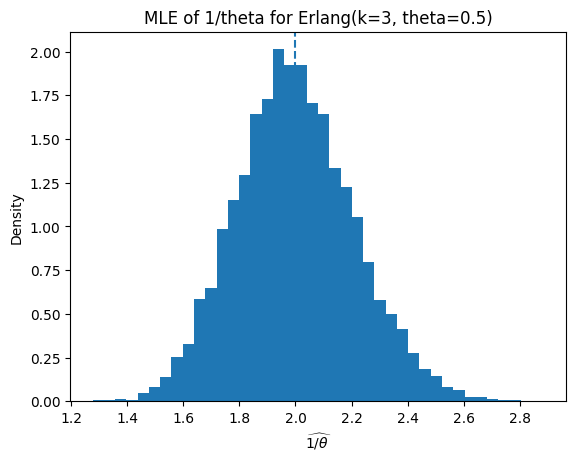

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# true parameters
theta_true = 0.5          # given
inv_theta_true = 1/theta_true   # = 2
k = 3                     # Erlang shape
n = 30                    # sample size in each experiment
N = 10_000                # number of experiments

# draw sample from Erlang(k, theta)
# Erlang(k, theta) = Gamma(shape=k, scale=1/theta)
def erlang_sample(k, theta, size):
    return np.random.gamma(shape=k, scale=1/theta, size=size)

# MLE for 1/theta :  X̄ / k
def mle_inv_theta(x, k):
    return x.mean() / k

# simulation
inv_theta_hats = np.empty(N)
for i in range(N):
    x = erlang_sample(k, theta_true, n)
    inv_theta_hats[i] = mle_inv_theta(x, k)

print("True 1/theta:", inv_theta_true)
print("Mean of estimator:", inv_theta_hats.mean())

# histogram of the estimator
plt.hist(inv_theta_hats, bins=40, density=True)
plt.axvline(inv_theta_true, linestyle='--')
plt.xlabel(r'$\widehat{1/\theta}$')
plt.ylabel('Density')
plt.title('MLE of 1/theta for Erlang(k=3, theta=0.5)')
plt.show()

# --- Simulation for Question 5C:

n = 8: mean(p_hat) = 0.2228, bias = 0.0228
n = 100: mean(p_hat) = 0.2016, bias = 0.0016


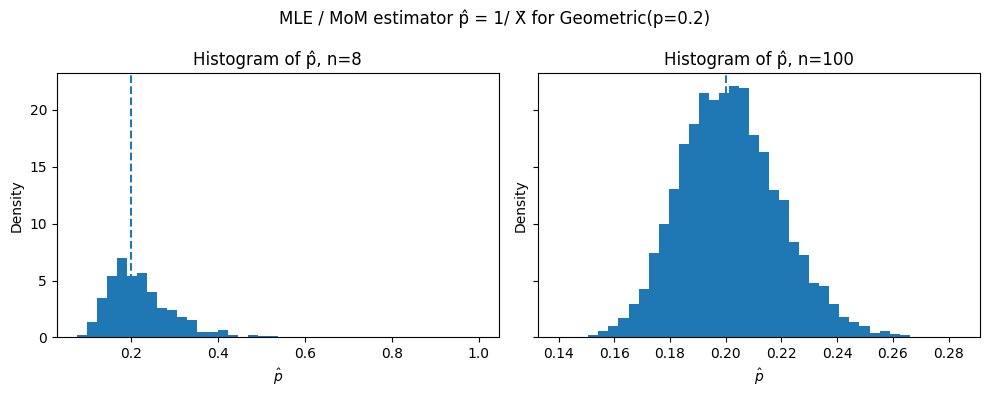

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# true parameter
p_true = 0.2

# estimator for p: p_hat = 1 / X̄
def estimate_p(sample):
    return 1.0 / sample.mean()

# simulation settings
N = 10_000              # number of repetitions
n_values = [8, 100]     # sample sizes

results = {}

for n in n_values:
    p_hats = np.empty(N)
    for i in range(N):
        # geometric with support {1,2,...}, success prob p_true
        # numpy's geometric uses this parameterization
        x = np.random.geometric(p_true, size=n)
        p_hats[i] = estimate_p(x)
    results[n] = p_hats
    # bias = E[p_hat] - p
    bias = p_hats.mean() - p_true
    print(f"n = {n}: mean(p_hat) = {p_hats.mean():.4f}, bias = {bias:.4f}")

# histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for ax, n in zip(axes, n_values):
    ax.hist(results[n], bins=40, density=True)
    ax.axvline(p_true, linestyle='--')
    ax.set_title(f"Histogram of p̂, n={n}")
    ax.set_xlabel(r'$\hat p$')
    ax.set_ylabel('Density')

fig.suptitle("MLE / MoM estimator p̂ = 1/ X̄ for Geometric(p=0.2)")
plt.tight_layout()
plt.show()

# --- Simulation for Question 6C:

n = 10
True theta:           2.0
Theoretical E[θ̂]:    2.2222
Empirical   E[θ̂]:    2.2252
Theoretical Var(θ̂):  0.6173
Empirical   Var(θ̂):  0.6080


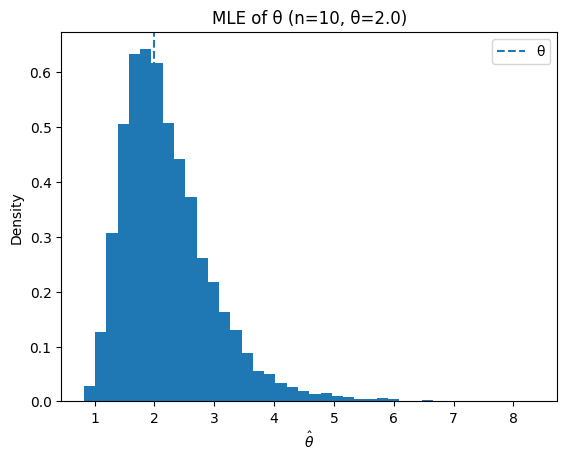

In [39]:
import numpy as np
import matplotlib.pyplot as plt

theta_true = 2.0
n = 10
N = 10_000            # number of simulations

def mle_theta(sample):
    # θ-hat = n / sum Xi
    return len(sample) / sample.sum()

theta_hats = np.empty(N)

for i in range(N):
    # Exp(θ): NumPy uses scale = 1/θ
    x = np.random.exponential(scale=1/theta_true, size=n)
    theta_hats[i] = mle_theta(x)

# empirical mean and variance from simulation
emp_mean = theta_hats.mean()
emp_var = theta_hats.var(ddof=0)

# theoretical mean and variance from part (a)
theo_mean = theta_true * n / (n - 1)
theo_var  = (theta_true**2) * (n**2) / ((n - 1)**2 * (n - 2))

print(f"n = {n}")
print(f"True theta:           {theta_true}")
print(f"Theoretical E[θ̂]:    {theo_mean:.4f}")
print(f"Empirical   E[θ̂]:    {emp_mean:.4f}")
print(f"Theoretical Var(θ̂):  {theo_var:.4f}")
print(f"Empirical   Var(θ̂):  {emp_var:.4f}")

# histogram of θ-hat
plt.hist(theta_hats, bins=40, density=True)
plt.axvline(theta_true, linestyle='--', label='θ')
plt.xlabel(r'$\hat\theta$')
plt.ylabel('Density')
plt.title(f'MLE of θ (n={n}, θ={theta_true})')
plt.legend()
plt.show()

# --- Simulation for Question 7C:

True θ = 10
MSE (MOM): 0.4005
MSE (MLE): 0.0742


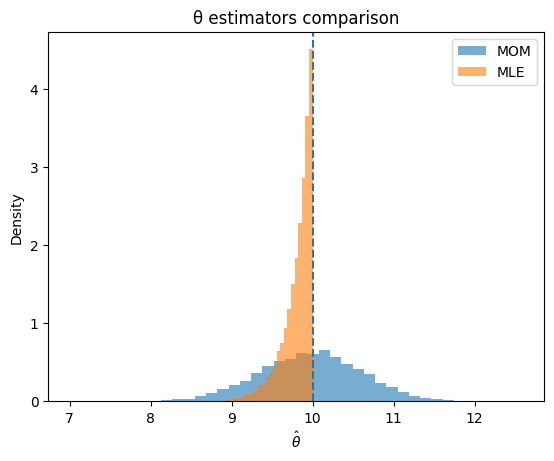

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# true parameter
theta_true = 10
n = 50              # sample size (can be changed)
N = 10_000          # number of simulations

# estimators:
# MOM: sqrt(3 * mean(X^2))
# MLE: max(|X|)
def theta_mom(sample):
    return np.sqrt(3 * np.mean(sample**2))

def theta_mle(sample):
    return np.max(np.abs(sample))

mom_hats = np.empty(N)
mle_hats = np.empty(N)

for i in range(N):
    # generate from U(-theta, theta)
    x = np.random.uniform(-theta_true, theta_true, size=n)
    mom_hats[i] = theta_mom(x)
    mle_hats[i] = theta_mle(x)

# compute MSE = E[(theta_hat - theta)^2]
mse_mom = np.mean((mom_hats - theta_true)**2)
mse_mle = np.mean((mle_hats - theta_true)**2)

print(f"True θ = {theta_true}")
print(f"MSE (MOM): {mse_mom:.4f}")
print(f"MSE (MLE): {mse_mle:.4f}")

# histograms
plt.hist(mom_hats, bins=40, density=True, alpha=0.6, label='MOM')
plt.hist(mle_hats, bins=40, density=True, alpha=0.6, label='MLE')
plt.axvline(theta_true, linestyle='--')
plt.title("θ estimators comparison")
plt.xlabel(r'$\hat\theta$')
plt.ylabel('Density')
plt.legend()
plt.show()